# Note to The Reader

This notebook builds off the data camp project "EXTRACT STOCK SENTIMENT FROM NEWS HEADLINES". While the basic functionality demonstrated in the project is reproduced, this notebook also seeks to go beyond what is demonstrated in the project by extending the model sentiment model evaluation/development

# Searching for gold inside HTML files
<p>In this notebook, we will generate investing insight by applying sentiment analysis on financial news headlines from <a href="https://finviz.com">FINVIZ.com</a>. Using natural language processing, we can understand the emotion behind the headlines and predict whether the market <em>feels</em> good or bad about a stock. It would then be possible to make educated guesses on how certain stocks will perform and trade accordingly. (And hopefully, make money!)</p>
<p><img src="https://assets.datacamp.com/production/project_611/img/fb_headlines.png" alt="Facebook headlines from FINVIZ.com"></p>
<p>Why headlines? And why from FINVIZ?</p>
<ol>
<li>Headlines, which have similar length, are easier to parse and group than full articles, which vary in length.</li>
<li>FINVIZ has a list of trusted websites, and headlines from these sites tend to be more consistent in their jargon than those from independent bloggers. Consistent textual patterns will improve the sentiment analysis.</li>
</ol>
<p>As <a href="https://en.wikipedia.org/wiki/Web_scraping">web scraping</a> requires data science ethics (sending a lot of traffic to a FINVIZ's servers isn't very nice), the HTML files for Facebook and Tesla at various points in time have been downloaded. Let's import these files into memory.</p>
<p><strong>Disclaimer: Investing in the stock market involves risk and can lead to monetary loss. The content in this notebook is not to be taken as financial advice.</strong> </p>

# Import Libs

In [70]:
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [71]:
mpl.rcParams['font.size']=14

# Import Data

In [72]:
html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir('datasets'):
    #this is the path to the file.
    table_path = f'./datasets/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path, 'rb')
    # Read the contents of the file into 'html'
    html = BeautifulSoup(table_file)
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find('table', attrs={'id':'news-table'})
    # Add the table to our dictionary
    html_tables[table_name] = html_table

In [73]:
print('html_tables:')
display(list(html_tables.keys()))

html_tables:


['fb_22sep.html',
 'tsla_22sep.html',
 'fb_05ene.html',
 'tsla_26nov.html',
 'tsla_05ene.html']

# Inspect html meta
Before we start parsing those tables further, we need to understand how the data in that table is structured.

In [74]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']

In [75]:
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.find_all('tr')

for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.find('a').get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.find('td').get_text()
    # Print the count
    print(f'{i}:')
    # Print the contents of 'link_text' and 'data_text' 
    print('\t',link_text)
    print('\t',data_text)

0:
	 Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
	 Sep-21-18 09:56PM  
1:
	 Broadcoms Stock Looks Like a Winner
	 09:30PM  
2:
	 SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
	 05:30PM  
3:
	 Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
	 05:30PM  
4:
	 Tesla Model 3 Crash Test Rating 2018: It Earns Top NHTSA Safety Rating
	 05:03PM  
5:
	 Yet Another Tesla Exec Leaves Amid Festering Finance Questions
	 03:26PM  
6:
	 7 Activist Stocks for Investors to Consider
	 03:18PM  
7:
	 CLASS ACTION UPDATE for TSLA, PDD and SBGI: Levi & Korsinsky, LLP Reminds Investors of Class Actions on Behalf of Shareholders
	 03:12PM  
8:
	 Wall Street's Reefer Madness, Micron Earnings, & More Stock News
	 01:53PM  
9:
	 Is Ford Stock Too Cheap to Ignore?
	 01:06PM  
10:
	 Tesla Slips as Another Executive Reportedly Exits
	 1

## Extract the news headlines
The interesting data inside each table row (<code>&lt;tr&gt;</code>) is in the text inside the <code>&lt;td&gt;</code> and <code>&lt;a&gt;</code> tags. Below, we parse all the data for <strong>all</strong> tables into a list.

In [76]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        
        #fetch the headline str
        headline = x.find('a').get_text()
        
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, headline])

In [77]:
print('n headlines:',len(parsed_news))

df = pd.DataFrame(parsed_news, columns = ['ticker','date','time','headline'])
display(df.head(),df.tail())
del df

n headlines: 500


,ticker,date,time,headline
0,fb,Sep-22-18,11:08AM,How former Facebook and Google engineer Bret T...
1,fb,Sep-22-18,12:02AM,"White House Drafts Order To Look Into Google, ..."
2,fb,Sep-21-18,06:21PM,Facebook Withdraws Direct Promotion of Politic...
3,fb,Sep-21-18,06:18PM,Facebook's Plan to Pull Back Campaign Support ...
4,fb,Sep-21-18,06:17PM,Facebook's Plan to Pull Back Campaign Support ...


,ticker,date,time,headline
495,tsla,Jan-02-19,09:19AM,Norway's electric cars zip to new record: almo...
496,tsla,Jan-02-19,09:13AM,"Tesla cuts prices on all models by $2,000 to o..."
497,tsla,Jan-02-19,09:08AM,"Tesla shares dive after price cut, production ..."
498,tsla,Jan-02-19,08:56AM,Hedge fund all-star David Einhorn posts his wo...
499,tsla,Jan-02-19,08:47AM,"Tesla produced 61,394 Model 3s in fourth quarter"


# Import NLTK and add new keywords

In [78]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/johnleonard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [79]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

# BREAKING NEWS: NLTK Crushes Sentiment Estimates
Now that we have the data and the algorithm loaded, we programmatically predicting sentiment of news headlines. VADER is very high level so, in this case, we will not adjust the model further other than the lexicon additions from before.
    
VADER "out-of-the-box" with some extra lexicon would likely translate into heavy losses with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.

In [80]:
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)
display(scored_news.head())

,ticker,date,time,headline
0,fb,Sep-22-18,11:08AM,How former Facebook and Google engineer Bret T...
1,fb,Sep-22-18,12:02AM,"White House Drafts Order To Look Into Google, ..."
2,fb,Sep-21-18,06:21PM,Facebook Withdraws Direct Promotion of Politic...
3,fb,Sep-21-18,06:18PM,Facebook's Plan to Pull Back Campaign Support ...
4,fb,Sep-21-18,06:17PM,Facebook's Plan to Pull Back Campaign Support ...


In [81]:
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(text) for text in scored_news['headline']]
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames
scored_news = pd.concat((scored_news, scores_df),axis=1)
# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [82]:
display(scored_news.head(),scored_news.shape)

,ticker,date,time,headline,compound,neg,neu,pos
0,fb,2018-09-22,11:08AM,How former Facebook and Google engineer Bret T...,0.5106,0.0,0.798,0.202
1,fb,2018-09-22,12:02AM,"White House Drafts Order To Look Into Google, ...",0.0000,0.0,1.000,0.000
2,fb,2018-09-21,06:21PM,Facebook Withdraws Direct Promotion of Politic...,0.0000,0.0,1.000,0.000
3,fb,2018-09-21,06:18PM,Facebook's Plan to Pull Back Campaign Support ...,0.4019,0.0,0.787,0.213
4,fb,2018-09-21,06:17PM,Facebook's Plan to Pull Back Campaign Support ...,0.4019,0.0,0.787,0.213


(500, 8)

# Plot all the sentiment in subplots

Now that we have the scores, let's start plotting the results. We will start by plotting the time series for the stocks we have.

'mean_c (groupby)'

compound       neg       neu       pos
date       ticker                                        
2018-09-18 fb     -0.052564  0.104864  0.843682  0.051455
           tsla   -0.085650  0.112875  0.807688  0.079438
2018-09-19 fb      0.057568  0.072920  0.805560  0.121640
           tsla   -0.025949  0.066732  0.879244  0.054000
2018-09-20 fb      0.018447  0.059567  0.870233  0.070200



mean_c (unstack)


compound                 neg                 neu            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2018-09-18 -0.052564 -0.085650  0.104864  0.112875  0.843682  0.807688   
2018-09-19  0.057568 -0.025949  0.072920  0.066732  0.805560  0.879244   
2018-09-20  0.018447  0.148757  0.059567  0.067304  0.870233  0.762609   
2018-09-21  0.014310 -0.030190  0.052762  0.102150  0.886381  0.813900   
2018-09-22  0.255300       NaN  0.000000       NaN  0.899000       NaN   

                 pos            
ticker            fb      tsla  
date                            
2018-09-18  0.051455  0.079438  
2018-09-19  0.121640  0.054000  
2018-09-20  0.070200  0.170087  
2018-09-21  0.060857  0.083950  
2018-09-22  0.101000       NaN



mean_c (cross section)


ticker,fb,tsla
date,,
2018-09-18,-0.052564,-0.085650
2018-09-19,0.057568,-0.025949
2018-09-20,0.018447,0.148757
2018-09-21,0.014310,-0.030190
2018-09-22,0.255300,NaN


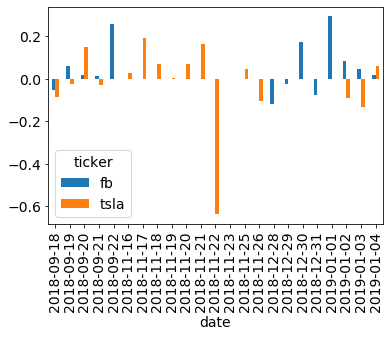

In [83]:
# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date','ticker']).mean()
display('mean_c (groupby)', mean_c.head())

# Unstack the column ticker
mean_c = mean_c.unstack()
print('\n\nmean_c (unstack)')
display( mean_c.head())

# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs(key='compound',axis=1)
print('\n\nmean_c (cross section)')
display(mean_c.head())

# Plot a bar chart with pandas
mean_c.plot.bar()
plt.show()

# Weekends and duplicates

What happened to Tesla on November 22nd? Since we happen to have the headlines inside our DataFrame, a quick peek reveals that there are a few problems with that particular day:
* There are only 5 headlines for that day.
* Two headlines are verbatim the same as another but from another news outlet.

Let's clean up the dataset a bit, but not too much! While some headlines are the same news piece from different sources, the fact that they are written differently could provide different perspectives on the same story. Plus, when one piece of news is more important, it tends to get more headlines from multiple sources. What we want to get rid of is verbatim copied headlines, as these are very likely coming from the same journalist and are just being "forwarded" around, so to speak.

In [84]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.shape[0]
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['ticker', 'headline'])
# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.shape[0]
# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 500 headlines, now we have 476'

# Sentiment on one single trading day and stock

Just to understand the possibilities of this dataset and get a better feel of the data, let's focus on one trading day and one single stock. We will make an informative plot where we will see the smallest grain possible: headline and subscores.

In [89]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.xs('fb')
# Select the 3rd of January of 2019
single_day = single_day[single_day.index == '2019-01-03']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time
# Set the index to time and 
single_day = single_day.set_index('time')
 # Sort it
single_day = single_day.sort_index()

In [91]:
single_day

,headline,compound,neg,neu,pos
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.0000,0.000,1.000,0.000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.0000,0.000,1.000,0.000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.2500,0.000,0.846,0.154
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.0000,0.000,1.000,0.000
09:34:00,Apple warning stoking fears of slowdown in Chi...,-0.6369,0.426,0.574,0.000
09:48:00,"Stock Market News For Jan 3, 2019",0.0000,0.000,1.000,0.000
09:58:00,Facebook Falls 3%,-0.9993,0.981,0.019,0.000
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.2960,0.000,0.784,0.216
10:21:00,Facebook Under Fire for Collecting Data From A...,-0.3400,0.231,0.769,0.000


# Visualize the single day

We will make a plot to visualize the positive, negative and neutral scores for a single day of trading and a single stock.

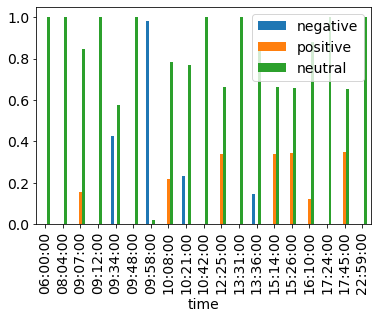

In [98]:
TITLE = "Positive, negative and neutral sentiment for FB on 2019-01-03"
COLORS = ["red", "orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day[['neg','pos','neu']]
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ["negative", "positive","neutral"]
# Plot a stacked bar chart
plot_day.plot.bar()

In [97]:
plot_day

,neg,neu,pos
time,,,
06:00:00,0.000,1.000,0.000
08:04:00,0.000,1.000,0.000
09:07:00,0.000,0.846,0.154
09:12:00,0.000,1.000,0.000
09:34:00,0.426,0.574,0.000
09:48:00,0.000,1.000,0.000
09:58:00,0.981,0.019,0.000
10:08:00,0.000,0.784,0.216
10:21:00,0.231,0.769,0.000
